In [52]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import scikitplot as skl
sns.set()
%matplotlib inline


In [53]:
df = pd.read_csv('Dataset/UCI_Credit_Card.csv')
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.rename(columns={'default.payment.next.month':'Defpay'},inplace=True)
#train_set = df.iloc[0: , :]
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defpay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [55]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Defpay'],
      dtype='object')

In [56]:
x = df.drop("Defpay",axis=1)   #Feature Matrix
y = df["Defpay"]

In [57]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defpay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [58]:
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [59]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Defpay, dtype: int64

In [60]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [61]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    # Split df into X and y
    y = df['Defpay'].copy()
    x = df.drop('Defpay', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    
    return x, y

In [62]:
x, y = preprocess_inputs(df)

In [63]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0)

x_train.shape, x_test.shape

((24000, 32), (6000, 32))

In [64]:
x_train.corr()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
LIMIT_BAL,1.000000,0.027545,0.147271,-0.270446,-0.296305,-0.284921,-0.266832,-0.251183,-0.236602,0.285814,...,0.256597,-0.148060,-0.136778,0.024155,0.001708,-0.002597,-0.011356,0.105556,-0.093521,-0.053271
SEX,0.027545,1.000000,-0.087862,-0.061660,-0.075115,-0.069527,-0.062446,-0.057536,-0.045214,-0.037194,...,-0.020629,0.023759,-0.008413,0.007129,0.013077,-0.008442,0.010362,0.032354,-0.032334,-0.004093
AGE,0.147271,-0.087862,1.000000,-0.035638,-0.046641,-0.050236,-0.048959,-0.052964,-0.048595,0.059415,...,-0.097938,-0.083285,0.235506,-0.010207,-0.000513,0.042745,0.006457,0.447760,-0.464631,0.084386
PAY_1,-0.270446,-0.061660,-0.035638,1.000000,0.676137,0.576659,0.538155,0.508166,0.472351,0.188749,...,-0.146656,0.101226,0.060291,-0.025020,-0.009816,-0.001335,-0.009117,-0.010734,0.007908,0.017547
PAY_2,-0.296305,-0.075115,-0.046641,0.676137,1.000000,0.762651,0.659394,0.621007,0.571322,0.234875,...,-0.170487,0.119347,0.069615,-0.032324,-0.013685,-0.003315,-0.006168,-0.015536,0.013310,0.013330
PAY_3,-0.284921,-0.069527,-0.050236,0.576659,0.762651,1.000000,0.777818,0.687701,0.629312,0.207061,...,-0.163136,0.116030,0.065198,-0.029559,-0.016659,-0.004786,-0.004223,-0.023745,0.020221,0.018810
PAY_4,-0.266832,-0.062446,-0.048959,0.538155,0.659394,0.777818,1.000000,0.818956,0.711483,0.202708,...,-0.152174,0.108455,0.059855,-0.028986,-0.014013,-0.002947,-0.006514,-0.025830,0.022744,0.017587
PAY_5,-0.251183,-0.057536,-0.052964,0.508166,0.621007,0.687701,0.818956,1.000000,0.814856,0.205191,...,-0.138451,0.100341,0.052281,-0.025569,-0.011299,-0.004966,-0.004975,-0.030459,0.028685,0.010473
PAY_6,-0.236602,-0.045214,-0.048595,0.472351,0.571322,0.629312,0.711483,0.814856,1.000000,0.204697,...,-0.123694,0.094562,0.044842,-0.021007,-0.024127,-0.013840,-0.004895,-0.028546,0.025796,0.015244
BILL_AMT1,0.285814,-0.037194,0.059415,0.188749,0.234875,0.207061,0.202708,0.205191,0.204697,1.000000,...,-0.023300,0.027666,-0.019409,0.007260,0.035091,0.024544,-0.018285,0.030866,-0.027638,-0.007925


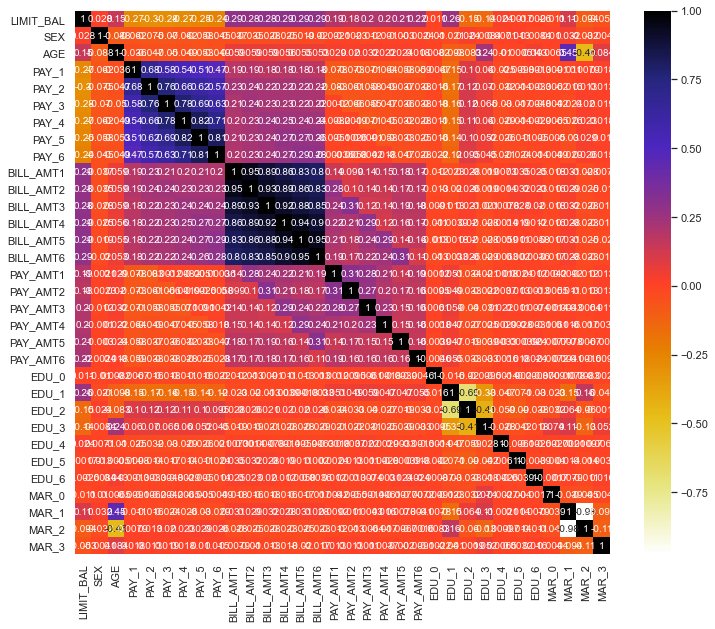

In [66]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [67]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

8

In [69]:
corr_features

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'MAR_2',
 'PAY_5',
 'PAY_6'}

In [70]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_3
8225,-1.136720,-1.234323,-0.269643,0.904712,1.782348,1.809921,1.899436,-0.451585,-0.341942,-0.158901,...,-0.021608,1.354326,-0.937295,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,-0.104326
10794,-1.136720,0.810161,-0.052670,0.014861,0.111736,1.809921,0.188746,-0.471182,-0.136665,-0.256990,...,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,-0.104326
9163,0.481833,0.810161,0.923707,0.904712,-0.723570,-0.696663,-0.666599,-0.642895,-0.284645,-0.132296,...,-0.021608,1.354326,-0.937295,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-0.104326
26591,-0.520128,-1.234323,0.706734,0.014861,0.111736,0.138865,0.188746,0.641093,-0.040064,-0.170186,...,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-0.104326
6631,-0.134759,-1.234323,-0.703588,-1.764843,-1.558876,-1.532192,-1.521944,-0.633402,0.080023,-0.220836,...,-0.021608,1.354326,-0.937295,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,0.635981,0.810161,-0.052670,0.904712,1.782348,1.809921,1.899436,1.968757,-0.341942,0.480842,...,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-0.104326
28867,0.327685,0.810161,1.140680,0.014861,0.111736,0.138865,0.188746,-0.006836,-0.154113,-0.165455,...,-0.021608,1.354326,-0.937295,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-0.104326
3758,-0.674276,-1.234323,-0.920561,0.014861,0.111736,0.138865,-0.666599,-0.391695,-0.251378,-0.126784,...,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-0.104326
17842,-1.136720,-1.234323,-1.246020,1.794564,1.782348,1.809921,1.899436,-0.475107,-0.305716,-0.213588,...,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,-0.104326


In [95]:
x_test.to_excel("Test.xlsx")

### ML Algorithms

In [71]:

#-------------- 
# Logistic Regression 
#--------------
#x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy on Test Set for Logistic Regression  = %.2f" %(accuracy))

#-------------- 
# Random Forest 
#--------------
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( x_train, y_train )
y_pred = classifier.predict( x_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresRF = cross_val_score( classifier, x_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

#-------------- 
# kernel SVM 
#--------------

classifier1 = SVC(kernel="rbf")
classifier1.fit( x_train, y_train )
y_pred = classifier1.predict( x_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresSVC = cross_val_score( classifier1, x_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
      
#-------------- 
# Naive Bayes 
#--------------

classifier3 = GaussianNB()
classifier3.fit( x_train, y_train )
y_pred = classifier3.predict( x_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresNB = cross_val_score( classifier3, x_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))
      
#-------------- 
# K-NEIGHBOURS 
#--------------

classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( x_train, y_train )
y_pred = classifier4.predict( x_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresKN = cross_val_score( classifier4, x_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))
      

#-------------- 
# DecisionTree 
#--------------

classifier5 = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=6)
classifier5
classifier5.fit( x_train, y_train )
y_pred = classifier5.predict( x_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for DecisionTreeClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))

#-------------- 
# BernoulliNB Naive Bayes 
#--------------

classifier6 = BernoulliNB()
classifier6.fit( x_train, y_train )
y_pred = classifier6.predict( x_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for BernoulliNB = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresNB = cross_val_score( classifier6, x_train, y_train, cv=10)
print("Mean BernoulliNB CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))


      

Accuracy on Test Set for Logistic Regression  = 0.82
Accuracy on Test Set for RandomForest = 0.81
Mean RandomForest CrossVal Accuracy on Train Set 0.80, with std=0.00
Accuracy on Test Set for kernel-SVM = 0.82
Mean kernel-SVM CrossVal Accuracy on Train Set 0.82, with std=0.01
Accuracy on Test Set for NBClassifier = 0.28
Mean NaiveBayes CrossVal Accuracy on Train Set 0.28, with std=0.00
Accuracy on Test Set for KNeighborsClassifier = 0.79
Mean KN CrossVal Accuracy on Train Set Set 0.79, with std=0.01
Accuracy on Test Set for DecisionTreeClassifier = 0.83
Accuracy on Test Set for BernoulliNB = 0.68
Mean BernoulliNB CrossVal Accuracy on Train Set 0.67, with std=0.01


In [72]:
#-------------- 
# MPC Classifier Neural Network 
#--------------

classifier7 = MLPClassifier()
classifier7.fit( x_train, y_train )
y_pred = classifier7.predict( x_test )
print("Accuracy on Test Set for MPC Classifier Neural Network = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresMLP = cross_val_score( classifier7, x_train, y_train, cv=10)
print("Mean MPC Classifier Neural Network CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresMLP.mean(), scoresMLP.std() ))

Accuracy on Test Set for MPC Classifier Neural Network = 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Mean MPC Classifier Neural Network CrossVal Accuracy on Train Set 0.81, with std=0.01


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Selected kernel-SVM

In [83]:
#-------------- 
# kernel SVM 
#--------------

classifier1 = SVC(kernel="rbf")
classifier1.fit( x_train, y_train )
y_pred = classifier1.predict( x_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresSVC = cross_val_score( classifier1, x_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))


Accuracy on Test Set for kernel-SVM = 0.82
Mean kernel-SVM CrossVal Accuracy on Train Set 0.82, with std=0.01


In [85]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4527,  176],
       [ 875,  422]], dtype=int64)

In [76]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [86]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8295

In [87]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9651286412927919

In [88]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8408669877732493

In [89]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8987228987228986

In [90]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6439716541107721

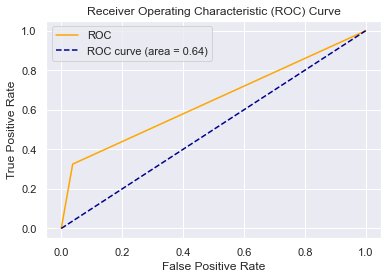

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Exporting a model

In [93]:
import pickle

filename = 'finalized_model_final_v3'
with open(filename, 'wb') as f:
    # save the model to disk
    pickle.dump(classifier1,f)
 

 
# load the model from disk
with open(filename, 'rb') as f:
    mp = pickle.load(f)

## Using x_test for Retesting test results

In [102]:
mp.predict([[-1.136720146,-1.234322957,-0.269642796,0.904712193,1.782348172,1.809921299,1.899435735,1.999879066,1.992315513,-0.451585476,-0.446521315,-0.403127148,-0.385656163,-0.338120153,-0.328845274,-0.341941619,-0.158901311,-0.296801274,-0.205929895,-0.314136117,-0.257155818,-0.021607511,1.354326157,-0.937295167,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,0.937671725,-0.104325689]])

array([1], dtype=int64)

In [97]:
mp.predict([[2.562830153,0.81016074,0.055816221,-0.874991148,-0.72356993,-0.696663456,-0.666598731,-0.64756476,-0.61645169,-0.547138338,-0.633672034,-0.621070701,-0.620610009,-0.642925675,-0.13181108,-0.095549121,-0.071099345,-0.107214011,-0.229931072,1.716358474,-0.232179964,-0.021607511,1.354326157,-0.937295167,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,0.937671725,-0.104325689]])

array([0], dtype=int64)

In [98]:
mp.predict([[0.250611216,-1.234322957,-0.920560831,0.904712193,1.782348172,1.809921299,1.899435735,1.999879066,1.992315513,0.826060596,0.929767088,0.93853648,1.173619733,1.323580671,1.424581059,0.050559638,-0.256989518,0.271165362,-0.052667063,0.013130756,-0.293382058,-0.021607511,-0.738374575,1.066899773,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,0.937671725,-0.104325689]])

array([0], dtype=int64)

In [99]:
mp.predict([[2.177460331,-1.234322957,-0.161156457,0.014860523,0.111736104,0.138864795,0.188746091,0.234916515,0.253137378,2.845259896,2.51973328,2.678494331,2.560818945,2.537934032,2.723152932,0.880964542,1.920525277,0.106227851,0.113490019,0.341183071,0.26913719,-0.021607511,1.354326157,-0.937295167,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,0.937671725,-0.104325689]])

array([0], dtype=int64)

In [100]:
mp.predict([[-0.905498252,-1.234322957,1.900083987,0.014860523,0.111736104,0.138864795,0.188746091,0.234916515,-0.61645169,-0.027885396,0.003750388,-0.152392564,-0.287182289,-0.252391029,-0.171607487,-0.220647199,-0.148484865,-0.240004611,-0.212313187,1.580019094,-0.225879748,-0.021607511,-0.738374575,1.066899773,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,-1.066471318,9.585366814]])

array([0], dtype=int64)

In [103]:
mp.predict([[-1.136720146,-1.234322957,-1.246019848,1.794563864,1.782348172,1.809921299,1.899435735,1.999879066,1.992315513,-0.475107016,-0.462299863,-0.436898737,-0.38761476,-0.371345945,-0.32619218,-0.305716307,-0.213587657,-0.171848614,-0.308062562,-0.183229368,-0.293382058,-0.021607511,-0.738374575,1.066899773,-0.44275183,-0.064162911,-0.097063202,-0.041266147,-0.042464642,-0.91426088,0.937671725,-0.104325689]])

array([1], dtype=int64)